In [1]:
import glob
import pandas as pd
import random
import paho.mqtt.client as mqtt
import string
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
def fetch_stored_data(index=0, folder=None, cycle=True):
    
    if folder is None:
        if cycle:
            folder = './BLM_R5IM_Data/cycle/'
        else:
            folder = './BLM_R5IM_Data/R5IM_loss/'
    
    if folder[-1] != '/': folder += '/'        
        
    input_data = pd.read_csv(glob.glob(folder + '*.csv')[index])
    return input_data.drop(columns = input_data.columns[0]).to_numpy()

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5A01-6BC5

 Directory of C:\Users\yrr88966\Desktop\mighty waterfall use this one i cant delete the other one

04/07/2023  08:40    <DIR>          .
04/07/2023  08:40    <DIR>          ..
04/07/2023  08:40    <DIR>          .ipynb_checkpoints
04/07/2023  08:39    <DIR>          BLM_R5IM_Data
04/07/2023  08:35           535,710 Waterfall-Plot-Actual-Juypter.ipynb
               1 File(s)        535,710 bytes
               4 Dir(s)  406,963,818,496 bytes free


In [4]:
fetch_stored_data(2, None, False)

array([[-4.99939013e+00, -4.99939013e+00, -4.99939013e+00, ...,
        -4.99939013e+00, -4.99939013e+00, -4.99939013e+00],
       [-5.48999989e-03, -5.48999989e-03, -4.87999991e-03, ...,
        -3.04999994e-03, -3.65999993e-03, -2.43999995e-03],
       [ 1.21999998e-03,  1.21999998e-03,  1.82999996e-03, ...,
         1.09900003e-02,  6.70999987e-03,  7.31999986e-03],
       ...,
       [ 1.82999996e-03, -1.82999996e-03,  0.00000000e+00, ...,
         6.09999988e-04,  3.04999994e-03,  1.21999998e-03],
       [-1.82999996e-03,  3.04999994e-03,  1.82999996e-03, ...,
         3.65999993e-03,  2.43999995e-03,  1.21999998e-03],
       [ 5.06599993e-02,  5.18799983e-02,  5.37099987e-02, ...,
        -1.04979999e-01, -1.04979999e-01, -1.05590001e-01]])

In [5]:
fetch_stored_data()

array([[-4.99939013e+00, -4.99939013e+00, -4.99939013e+00, ...,
        -4.99939013e+00, -4.99939013e+00, -4.99939013e+00],
       [-6.70999987e-03, -4.87999991e-03, -4.26999992e-03, ...,
        -5.48999989e-03, -4.87999991e-03, -4.26999992e-03],
       [-3.04999994e-03,  6.09999988e-04,  1.21999998e-03, ...,
         4.26999992e-03,  4.26999992e-03,  6.09999988e-04],
       ...,
       [-3.04999994e-03,  1.21999998e-03,  2.43999995e-03, ...,
         2.43999995e-03, -1.21999998e-03,  0.00000000e+00],
       [-1.21999998e-03, -1.21999998e-03,  6.09999988e-04, ...,
        -6.70999987e-03, -4.87999991e-03, -4.87999991e-03],
       [ 3.53999995e-02,  3.53999995e-02,  3.60100009e-02, ...,
         2.31899992e-02,  2.31899992e-02,  2.31899992e-02]])

r 3
g 2
b 1
y 0


Text(0.5, 0, 'BLM Signal (Volts)')

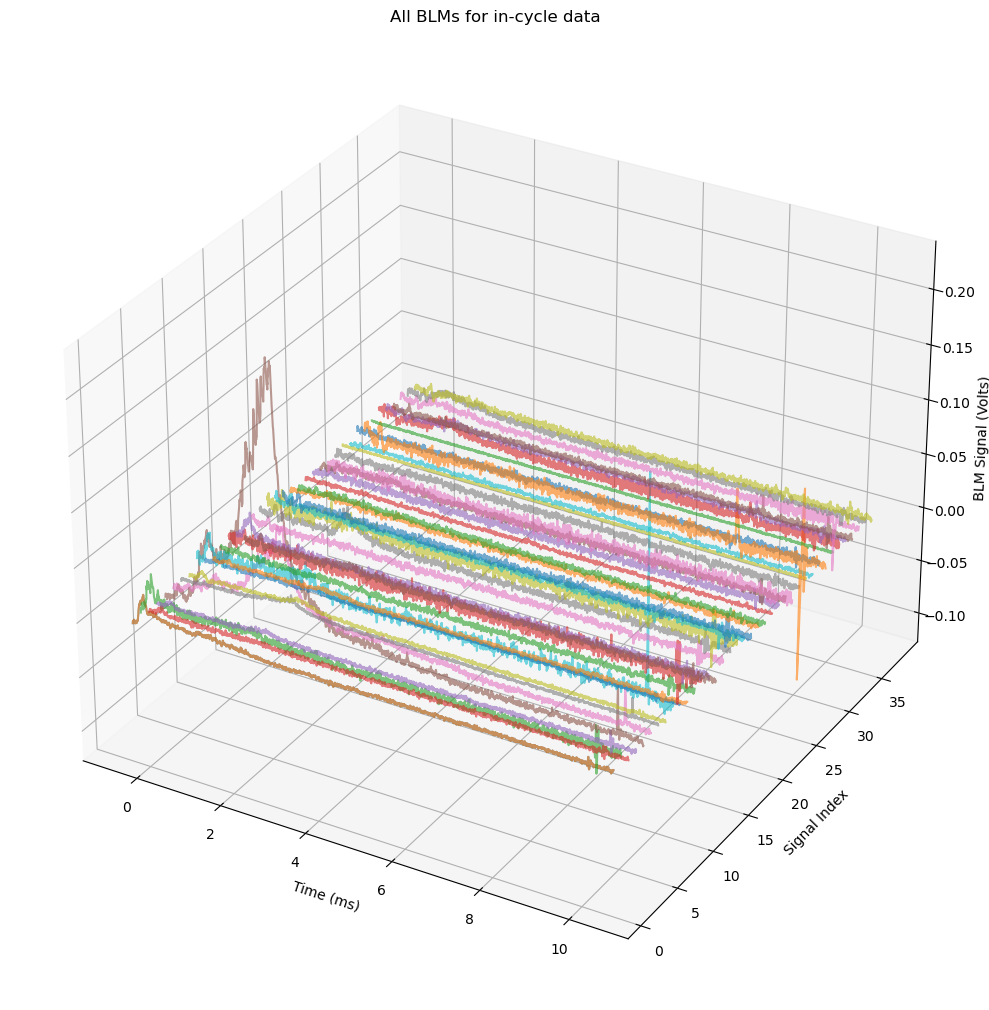

In [6]:
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    print (c,k)

x_data = np.linspace(-.5, 10.5, 2200)
blm_iterator_list = np.linspace(1,38,39, dtype=int)

fig = plt.figure(figsize=(10,11), tight_layout = True)
ax = fig.add_subplot(projection='3d')

for i in blm_iterator_list:
    
    # fetch_stored_data(n, None, False) = R5IM loss data, n = glob file index not BLM index
    # fetch_stored_data(n, None, True) = cycle data, n = glob file index not BLM index
    ax.plot(x_data, fetch_stored_data(0, None, True)[i], zs=i, zdir='y', alpha=0.6)
    
#ax.set_ylim(2,5)
#ax.set_xlim(-0.5, 10.5);
#ax.set_zlim(-0.01, 0.05);
plt.title('All BLMs for in-cycle data')
plt.xlabel('Time (ms)')
plt.ylabel('Signal Index')
ax.set_zlabel('BLM Signal (Volts)')

#Text(0.5, 0, 'BLM Signal (Volts)')

r 3
g 2
b 1
y 0


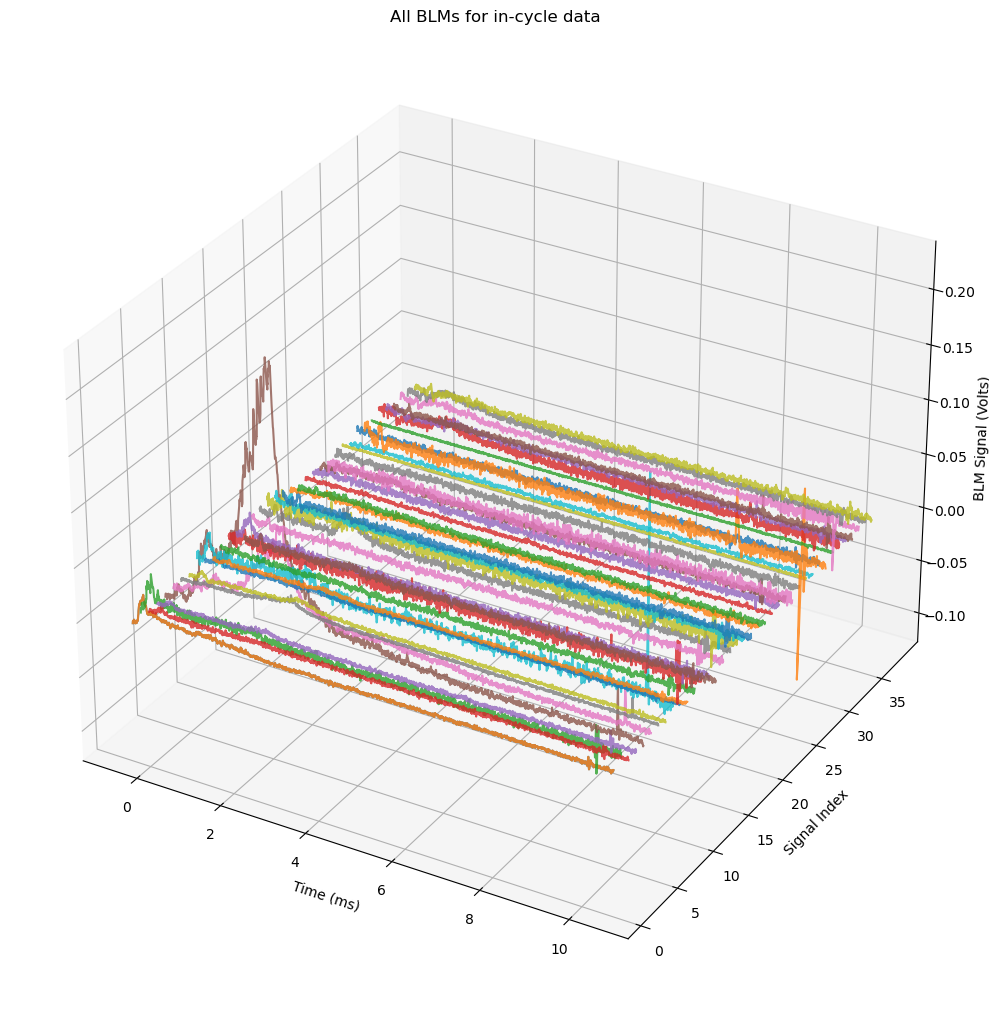

In [8]:
#y axis - test data
y = fetch_stored_data()
p = fetch_stored_data(0, None, True)

#Start of function
def waterfall(y):
    x_data = np.linspace(-.5, 10.5, 2200)
    blm_iterator_list = np.linspace(1,38,39, dtype=int)
    #Graph colours
    colors = ['r', 'g', 'b', 'y']
    yticks = [3, 2, 1, 0]
    for c, k in zip(colors, yticks):
        print (c,k)
        
    blm_iterator_list = np.linspace(1,38,39, dtype=int)

    fig = plt.figure(figsize=(10,11), tight_layout = True)
    ax = fig.add_subplot(projection='3d')


    x_data = np.linspace(-.5, 10.5, 2200)
    for i in blm_iterator_list:
    
    # fetch_stored_data(n, None, False) = R5IM loss data, n = glob file index not BLM index
    # fetch_stored_data(n, None, True) = cycle data, n = glob file index not BLM index
    #y data variable
        y=p[i]
        ax.plot(x_data,y , zs=i, zdir='y', alpha=0.8)
    
#ax.set_ylim(2,5)
#ax.set_xlim(-0.5, 10.5);
#ax.set_zlim(-0.01, 0.05);
    plt.title('All BLMs for in-cycle data')
    plt.xlabel('Time (ms)')
    plt.ylabel('Signal Index')
    ax.set_zlabel('BLM Signal (Volts)')
#End of function

    
#Text(0.5, 0, 'BLM Signal (Volts)')
waterfall(y)
plt.show()